# Learning Objectives

At the end of this class, you will be able to...

- Compute probability density functions and cumulative density functions

- Use the `scipy.stats` package to compute the Survaival Value or CDF Value for a known distribution

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('./Datasets/titanic.csv')

## Probability Distribution Function (PDF)

- PDFs have a similar pattern to histogram. The only difference is that we _normalize the value of histograms_

- Let's plot the histogram for Age in our Titanic dataset

- To visualize this data, we'll use the [seaborn](https://seaborn.pydata.org/) library

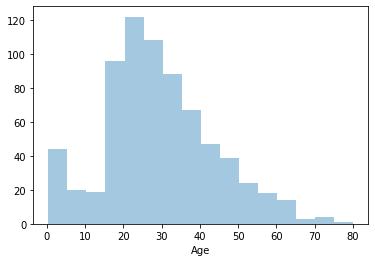

In [2]:
import seaborn as sns
sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16)

- Now let's  plot the PDF of Age in Titanic

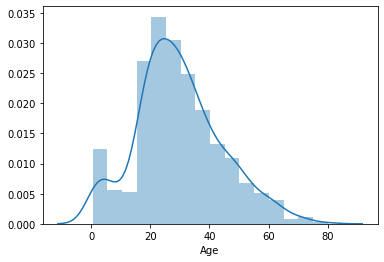

In [3]:
import seaborn as sns
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

## Activity: In PDFs, where does the y axes numbers come from?

For example, at Age 20, why is the y-value around 0.030?

In [10]:
# Y IS THE PROBABILTY OF THE AGE BEING 20
122/714/5

0.03417366946778712

In [65]:
import pandas as pd
# custom histogram function
# ls = input list
# num_interval = number of intervals
def custom_hist(ls, num_interval):
    hist_ls_dict = {}
    # minimum value in ls
    min_ls = np.min(ls)
 
    # maximum value in ls
    max_ls = np.max(ls)
    # Interval
    interval = np.ceil((max_ls - min_ls) / num_interval)

    for j in range(len(ls)):
        # Create how many elements in ls are at each interval j
        if j in hist_ls_dict:
            hist_ls_dict[j] += 1
        else:
            hist_ls_dict[j]= 1  
    return pd.DataFrame([hist_ls_dict]).plot.hist(grid=True, bins=20, rwidth=0.9) #turns data into a pandas df
    
print(custom_hist(df['Sex'].str.contains('Female'), df['Age'].value_counts()))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [13]:
hist_dict = custom_hist(df['Age'].dropna().values, 16)
sum(hist_dict.values())

120

In [15]:
122/714/4.97375

0.034354028115392926

## Activity: What percent of passengers are younger than 40?

In [10]:
# Find the number of passengers younger than 40
How_many_younger_40 = df[df['Age'] <= 40]
# Find the percentage of passengers who are younger than 40
# Do this by dividing the number of passengers younger than 40 by the total number of passengers (with an age)
pr_below_40 = len(How_many_younger_40)/len(df['Age'].dropna())
pr_below_40

0.7899159663865546

## It is not easy to calculate this percentage from PDFs as we should compute the area

## Cumulative Density Function (CDF)

- In above example, we could not easily obtain the percentage from a PDF, although it is possible.

- This is much easier if we use a CDF. A CDF calculates the probability that a random variable is less than a threshold value

- Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:

    1. Find the minimum value in the array
    1. Set the threshold to be the minimum value of the array
    1. For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
    1. Repeat step three, increasing the threshold by one, until you go through step three where threshold is equail to the maximum value in the array



In [ ]:
def count_lower(array, threshold):
    #min_array = min(array)
    #max_array = max(array)
    counter = 0
    for i in array:
        if i < threshold:
            counter += 1
    total = counter/len(array)
    
def count_upper(array, step_size):
    thres_hold_range = range(min(array), max(array), step_size)
    for i in thres_hold_range:
        count_lower(array, thres_hold_range)
            


In [10]:
ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold
cdf_age = [calculate_cdf(ls_age, r)/len(ls_age) for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]

print(cdf_age)

[0.0, 0.0196078431372549, 0.03361344537815126, 0.04201680672268908, 0.056022408963585436, 0.06162464985994398, 0.06582633053221289, 0.0700280112044818, 0.07563025210084033, 0.08683473389355742, 0.0896358543417367, 0.09523809523809523, 0.09663865546218488, 0.09943977591036414, 0.10784313725490197, 0.11624649859943978, 0.1400560224089636, 0.15826330532212884, 0.19467787114845939, 0.22969187675070027, 0.2507002801120448, 0.2857142857142857, 0.3235294117647059, 0.3445378151260504, 0.38795518207282914, 0.4215686274509804, 0.44677871148459386, 0.47198879551820727, 0.5070028011204482, 0.5378151260504201, 0.572829131652661, 0.5994397759103641, 0.6246498599439776, 0.6484593837535014, 0.6694677871148459, 0.696078431372549, 0.726890756302521, 0.7366946778711485, 0.7521008403361344, 0.7717086834733894, 0.7899159663865546, 0.8011204481792717, 0.819327731092437, 0.8263305322128851, 0.8389355742296919, 0.8557422969187675, 0.8627450980392157, 0.8753501400560224, 0.8879551820728291, 0.896358543417367, 

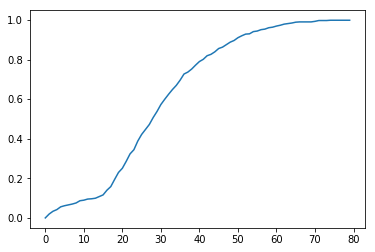

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)

## More about PDFs

Below we show a Violin plot. Per [Wikipedia](https://en.wikipedia.org/wiki/Violin_plot), a violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.

Violin plots are similar to box plots, except that they also show the **probability density (what a PDF shows!)** of the data at different values, usually smoothed by a kernel density estimator. 

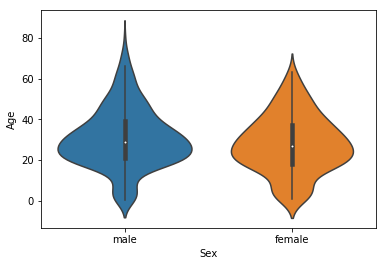

In [17]:
sns.violinplot(x="Sex", y="Age", data=df)

## Normal Distribution

- It is possible that when we plot a histogram or PDF of an array, it has a Bell Shape 

- The name of this histogram is **Normal**

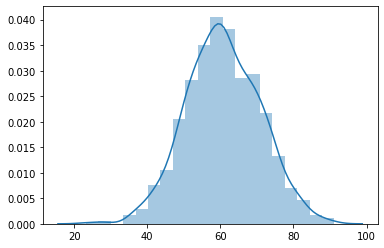

In [19]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20) #plotting normal distribution

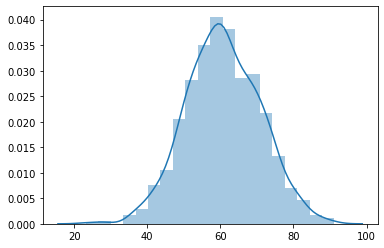

In [20]:
sns.distplot(a, hist=True, kde=True, bins=20)

## Activity: 

- The intrsuctor of DS graded last term's final exam. They are reporting that the mean was 60 (with scale of 100) with standard deviation of 10. 

_What is the probability that students got more than 70?_

In [21]:
from scipy.stats import norm

print(norm.sf(70, loc=60, scale=10))

# or

1 - norm.cdf(70, loc=60, scale=10)

0.15865525393145707


0.15865525393145707

## Normal Distribution Properties:

When the data is Normally distributed:

- 68% of the data is captured within one standard deviation from the mean.
- 95% of the data is captured within two standard deviations from the mean.
- 99.7% of the data is captured within three standard deviations from the mean.

<br><img src="http://www.oswego.edu/~srp/stats/images/normal_34.gif" /><br>

## Activity:

- Show that about 68% of the values are in the [50, 70] range


In [22]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

## If we scale the Normal Distribution, the result is zero mean and unit std 

**Unit std** means you are converting your data from its original units to units of standard deviation

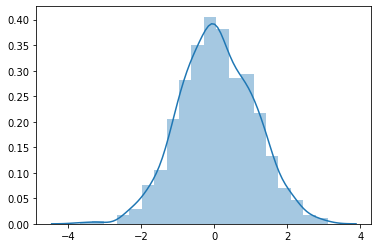

In [23]:
b = (a - 60)/10
sns.distplot(b, hist=True, kde=True, bins=20)

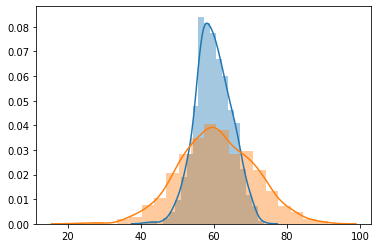

In [31]:
b = np.random.normal(60, 5, 1000)
sns.distplot(b, hist=True, kde=True, bins=20)
sns.distplot(a, hist=True, kde=True, bins=20)

### Subract All elements in a from its mean and then divide all the elements by its std.

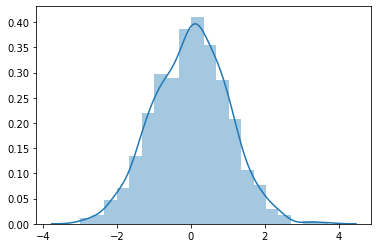

In [39]:
new_lst = []
for i in a:
    num = (np.mean(a) - i) / np.std(a)
    new_lst.append(num)

sns.distplot(new_lst, hist=True, kde=True, bins=20)   
# mean should be 0 
# std is 1 

## Z-Distribution 

- Z-distribution is another name for _standard Normal distribution_

- When the samples of our numerical array are Normal with an arbitrary mean and std

- If scale each element by subtracting elements from the mean, and divide over the std, then the new array would be a Normal distribution with zero mean, and std 1 
- The Z-Distribution is used for hypothesis testing